In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
conn = sqlite3.connect('C:/Users/dakot/Desktop/DataScience/Project Scrap work/trulia_project/trulia_sb_house_data.db')

df = pd.read_sql_query("SELECT * FROM trulia_house_SB_data_cleaned", conn)

In [3]:
df.head()
df.columns

Index(['level_0', 'index', 'price', 'address', 'zip', 'num_bedrooms',
       'num_baths', 'building_sqft', 'year_built', 'lot_area',
       'home_description', 'feature_list', 'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito', 'building_sqft_was_missing'],
      dtype='object')

In [4]:
df.describe()

,level_0,index,price,num_bedrooms,num_baths,building_sqft,year_built,lot_area,house_age,has_garage,has_fireplace,has_ocean_views,has_mountain_views,has_hope_ranch,has_montecito,building_sqft_was_missing
count,904.000000,904.000000,9.040000e+02,904.000000,904.000000,748.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,634.753319,634.753319,2.689024e+06,3.613938,3.192257,2558.525401,1966.831858,0.837652,55.168142,0.390487,0.415929,0.112832,0.185841,0.045354,0.160398,0.172566
std,374.272474,374.272474,1.890863e+06,0.977184,1.388382,1405.497693,24.646975,1.571113,24.646975,0.488130,0.493154,0.316562,0.389193,0.208194,0.367178,0.378081
min,0.000000,0.000000,9.500000e+03,2.000000,1.500000,668.000000,1900.000000,0.000002,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.750000,308.750000,1.360000e+06,3.000000,2.000000,1563.750000,1956.000000,0.170000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,625.500000,625.500000,1.958000e+06,4.000000,3.000000,2185.000000,1963.000000,0.288246,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,958.250000,958.250000,3.453250e+06,4.000000,4.000000,3041.250000,1985.000000,1.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1296.000000,1296.000000,9.910000e+06,9.000000,11.000000,10823.000000,2021.000000,15.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_model=df[['price', 'zip', 'num_bedrooms',
       'num_baths', 'building_sqft', 'lot_area', 'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito', 'building_sqft_was_missing']]

In [6]:
enc=OneHotEncoder(handle_unknown='ignore')

enc_df=pd.DataFrame(enc.fit_transform(df[['zip']]).toarray())
enc_df.columns=enc.get_feature_names(['zip'])

df_model=df_model.join(enc_df)
df_model.head()

,price,zip,num_bedrooms,num_baths,building_sqft,lot_area,house_age,has_garage,has_fireplace,has_ocean_views,...,building_sqft_was_missing,zip_93067,zip_93101,zip_93103,zip_93105,zip_93108,zip_93109,zip_93110,zip_93111,zip_93117
0,3900000.0,93108,3.0,3.0,2354.0,0.90,62.0,0,0,0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1780000.0,93105,3.0,2.0,1395.0,0.14,73.0,1,1,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1350000.0,93105,3.0,2.0,1344.0,0.44,50.0,0,1,0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2899000.0,93109,3.0,3.0,2558.0,0.42,42.0,0,1,0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1824215.0,93109,4.0,2.0,1407.0,0.14,63.0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
#need to sort out imputation with building sqft
X=df_model.drop(['price','zip','building_sqft'],axis=1)
y=df_model['price']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)


In [8]:
y=df_model.price.values
X_sm=sm.add_constant(X)
model=sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     94.65
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          8.09e-198
Time:                        15:30:47   Log-Likelihood:                -13846.
No. Observations:                 904   AIC:                         2.773e+04
Df Residuals:                     884   BIC:                         2.783e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      3.511e+05    1.8e+05      1.953      0.051   -1750.472    7.04e+05
num_bedrooms              -1.489e+05   4.98e+04     -2.991      0.003   -2.47e+05   -5.12e+04
num_baths                  7.593e+05   4.05e+04     18.756      0.000     6.8e+05    8.39e+05
lot_area                    1.46e+05   2.64e+04      5.538      0.000    9.43e+04    1.98e+05
house_age                  1693.5762   1637.581      1.034      0.301   -1520.424    4907.576
has_garage                -6.412e+04   7.85e+04     -0.817      0.414   -2.18e+05    8.99e+04
has_fireplace             -1.726e+04   7.83e+04     -0.220      0.826   -1.71e+05    1.36e+05
has_ocean_views            5.982e+04   1.24e+05      0.482      0.630   -1.84e+05    3.03e+05
has_mountain_views         6.843e+04   9.85e+04      0.695      0.487   -1.25e+05    2.62e+05
has_hope_ranch             7.494e+05   2.21e+05      3.390      0.001    3.15e+05    1.18e+06
has_montecito              7.403e+04   1.49e+05      0.498      0.618   -2.18e+05    3.66e+05
building_sqft_was_missing -4183.7873   1.04e+05     -0.040      0.968   -2.08e+05       2e+05
zip_93067                 -1.603e+05   7.08e+05     -0.226      0.821   -1.55e+06    1.23e+06
zip_93101                 -3.326e+05   1.67e+05     -1.986      0.047   -6.61e+05   -3954.353
zip_93103                   2.11e+05   1.37e+05      1.544      0.123   -5.73e+04    4.79e+05
zip_93105                 -3.285e+05   1.17e+05     -2.796      0.005   -5.59e+05   -9.79e+04
zip_93108                  1.436e+06   1.45e+05      9.900      0.000    1.15e+06    1.72e+06
zip_93109                  4.118e+05   1.49e+05      2.770      0.006     1.2e+05    7.04e+05
zip_93110                 -4.621e+04   1.51e+05     -0.305      0.760   -3.43e+05    2.51e+05
zip_93111                 -3.469e+05   1.39e+05     -2.495      0.013    -6.2e+05    -7.4e+04
zip_93117                  -4.93e+05   1.31e+05     -3.758      0.000   -7.51e+05   -2.36e+05
==============================================================================
Omnibus:                      168.828   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.539
Skew:                           0.816   Prob(JB):                    1.69e-153
Kurtosis:                       7.002   Cond. No.                     3.53e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
ln=LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [10]:
np.average(cross_val_score(ln,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-770101.668072184

In [11]:
lml=Lasso(alpha=10000)
lml.fit(X_train,y_train)
np.average(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

-761108.8712243416

,alpha,error
9,10000.0,-761108.871224


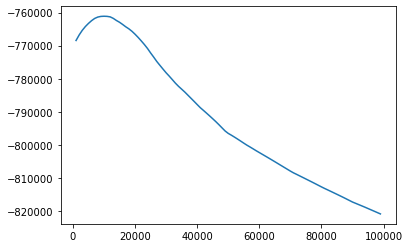

In [12]:
alpha=[]
error=[]

for i in range(1,100):
    alpha.append(i/.001)
    lml=Lasso(alpha=(i/.001))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error',cv=3)))

plt.plot(alpha,error)
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

In [13]:
rf=RandomForestRegressor()
np.average(cross_val_score(rf,X_train, y_train, scoring='neg_mean_absolute_error',cv=3))

-689387.0350069157

In [15]:


parameters={'n_estimators':range(10,300,10), 'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error', cv=3)

gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
gs.best_score_
gs.best_estimator_